In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./copy_loan_data.csv")
df.head()

,loan_amnt,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,open_acc,grade,borrower_score,outcome
0,2500,30000,1.00,2.39320,1687,9.4,3,4.8,0.65,default
1,5600,40000,5.55,4.57170,5210,32.6,11,1.4,0.80,default
2,5375,15000,18.08,9.71600,9279,36.5,2,6.0,0.60,default
3,9000,30000,10.08,12.21520,10452,91.7,4,4.2,0.50,default
4,10000,100000,7.06,3.90888,11997,55.5,14,5.4,0.55,default


In [5]:
df.shape

(45342, 10)

In [10]:
predictors = ['payment_inc_ratio','borrower_score','loan_amnt','annual_inc','dti']
outcome = 'outcome'
X = df[predictors]
Y = df[outcome]

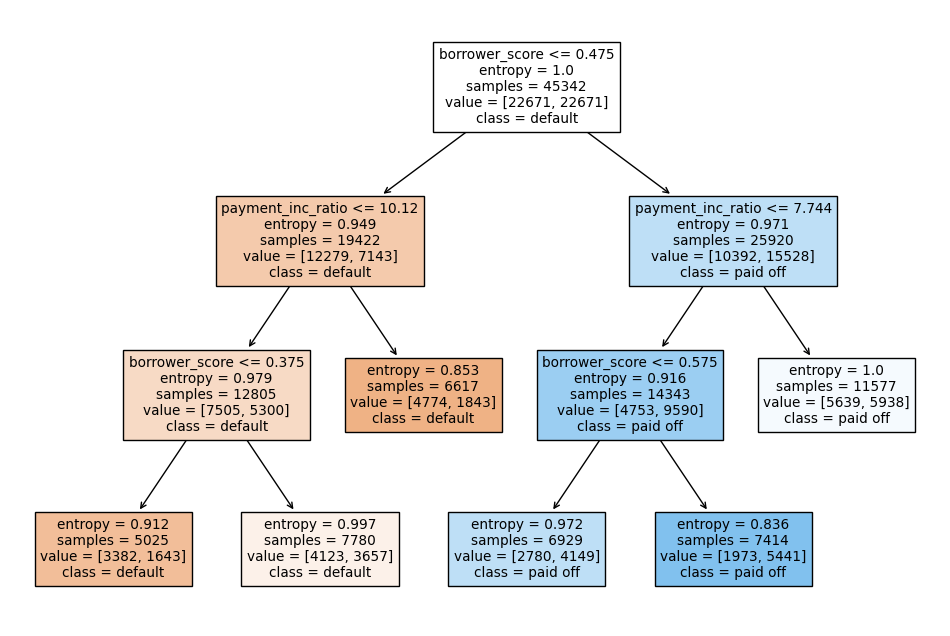

In [11]:
loan_tree = DecisionTreeClassifier(random_state=1,criterion='entropy',min_impurity_decrease=0.003)
loan_tree.fit(X,Y)
#plotDecisionTree(loan_tree,feature_names=predictors,class_names=loan_tree.classes_)
plt.figure(figsize=(12,8))
plot_tree(loan_tree,filled=True,feature_names=predictors,class_names=loan_tree.classes_)
plt.show()

In [8]:
loan_tree.classes_

array(['default', 'paid off'], dtype=object)